Saving googleplaystore.csv to googleplaystore (2).csv
Columns in the dataset: Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


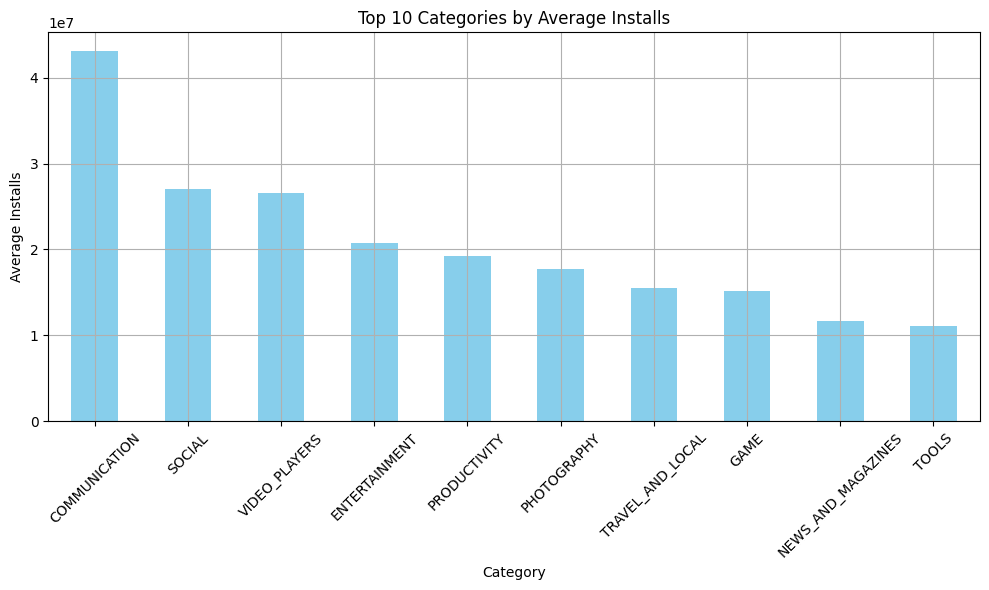

,Category,Installs,Rating,Reviews
0,COMMUNICATION,4.311813e+07,4.121484,1.116449e+06
1,SOCIAL,2.703370e+07,4.247291,1.122795e+06
2,VIDEO_PLAYERS,2.653241e+07,4.044595,4.559735e+05
3,ENTERTAINMENT,2.072216e+07,4.135294,3.408103e+05
4,PRODUCTIVITY,1.924608e+07,4.183389,1.846857e+05
5,PHOTOGRAPHY,1.767735e+07,4.157414,4.005750e+05
6,TRAVEL_AND_LOCAL,1.548053e+07,4.069519,1.434203e+05
7,GAME,1.521794e+07,4.247368,6.823420e+05
8,NEWS_AND_MAGAZINES,1.161329e+07,4.121569,1.133787e+05
9,TOOLS,1.114168e+07,4.039554,3.194369e+05


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Upload CSV
from google.colab import files
uploaded = files.upload()

# Load CSV and show columns
df = pd.read_csv('googleplaystore.csv')
print("Columns in the dataset:", df.columns)

# Check for correct column names
df.columns = df.columns.str.strip()  # remove extra spaces

# Use exact column names from your CSV
if 'App' not in df.columns:
    if 'App Name' in df.columns:
        df.rename(columns={'App Name': 'App'}, inplace=True)
    else:
        raise KeyError("The dataset does not contain a column for App name.")

# Drop duplicates
df = df.drop_duplicates(subset='App')

# Clean numeric columns
df = df[df['Rating'].astype(str) != 'NaN']
df = df[df['Rating'].astype(float) <= 5]

df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Drop missing values from required columns
df = df[['Category', 'Rating', 'Reviews', 'Installs']].dropna()

# Group and analyze
category_summary = df.groupby('Category').agg({
    'Installs': 'mean',
    'Rating': 'mean',
    'Reviews': 'mean'
}).sort_values(by='Installs', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
category_summary['Installs'].head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Categories by Average Installs')
plt.ylabel('Average Installs')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Display summary
category_summary.reset_index().head(10)
